This Dataset aimed to understand the impact of COVID-19-related stresses on pregnant individuals and their infants and collected survey-based data across Canada as part of the Pregnancy during the COVID-19 Pandemic (PdP) project.
Here are some information about the data:

- Maternal_Age: Maternal age (years) at intake
- Household_Income: What is the total household income, before taxes and deductions, of all the household members from all sources in 2019
- Maternal_Education: Maternal education
1- Less than high school
2- diploma
3- High school diploma
4- College/trade school
5- Undergraduate degree
6- Master's degree
7- Doctoral Degree
- EPDS: Edinburgh Postnatal Depression Scale 0-30 (After preganency chances of having anxiety) (you can find the survey on the internet) (0-9: no danger of depression, 9-12:mild chance, >=13: high chance of anxiety)
- PROMIS_Anxiety: Score from 7 to 35 with higher scores indicating greater severity of anxiety.
- GAbirth: Gestational age at birth (in weeks)
- Delivery_Date: Delivery Date (Dates converted to month/year of birth)
- Birth_Length: Birth length in cm
- Birth_Weight: Birth weight in grams
- Delivery_Mode: Vaginally or Caesarean-section (c-section)
- NICU_stay: Was your infant admitted to the NICU?
- Language: Survey language
- Threaten_Life: How much do (did) you think your life is (was) in danger during the COVID-19 pandemic? (0-100)
- Threaten_Baby_Danger: How much do (did) you think your unborn baby's life is (was) in danger at any time during the COVID-19 pandemic? (0-100)
- Threaten_Baby_Harm: How much are you worried that exposure to the COVID-19 virus will harm your unborn baby? (0-100)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
mental_health = pd.read_csv("Mental Health in Pregnancy During Covid-19.csv")

In [3]:
mental_health.shape

(10772, 16)

In [4]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSF_ID                                      10772 non-null  int64  
 1   Maternal_Age                                10661 non-null  float64
 2   Household_Income                            10521 non-null  object 
 3   Maternal_Education                          10595 non-null  object 
 4   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 5   PROMIS_Anxiety                              9566 non-null   float64
 6   Gestational_Age_At_Birth                    6734 non-null   float64
 7   Delivery_Date(converted to month and year)  6733 non-null   object 
 8   Birth_Length                                5480 non-null   float64
 9   Birth_Weight                                6078 non-null   float64
 10  Delivery_M

In [5]:
mental_health.head()

OSF_ID  Maternal_Age    Household_Income    Maternal_Education  \
0       1          38.3           $200,000+        Masters degree   
1       2          34.6           $200,000+  Undergraduate degree   
2       3          34.3  $100,000 -$124,999  Undergraduate degree   
3       4          28.8  $100,000 -$124,999        Masters degree   
4       5          36.5     $40,000-$69,999  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   
2                                   NaN             NaN   
3                                   9.0            20.0   
4                                  14.0            20.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                     39.71                                    Dec2020   
1                       NaN                                        NaN   
2                       NaN                                        NaN   
3                     38.57                                    Dec2020   
4                     39.86                                    Oct2020   

   Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0         49.20        3431.0                      Vaginally        No   
1           NaN           NaN                            NaN       NaN   
2           NaN           NaN                            NaN       NaN   
3         41.00        2534.0                      Vaginally        No   
4         53.34        3714.0  Caesarean-section (c-section)        No   

  Language  Threaten_Life  Threaten_Baby_Danger  Threaten_Baby_Harm  
0  English            2.0                   3.0                27.0  
1  English            2.0                  33.0                92.0  
2   French            NaN                   NaN                 NaN  
3   French           53.0                  67.0                54.0  
4  English           23.0                  32.0                71.0

In [6]:
mental_health.drop(['OSF_ID', 'Language'], axis=1, inplace=True)

In [7]:
mental_health.isnull().sum()

Maternal_Age                                   111
Household_Income                               251
Maternal_Education                             177
Edinburgh_Postnatal_Depression_Scale          1174
PROMIS_Anxiety                                1206
Gestational_Age_At_Birth                      4038
Delivery_Date(converted to month and year)    4039
Birth_Length                                  5292
Birth_Weight                                  4694
Delivery_Mode                                 5235
NICU_Stay                                     5238
Threaten_Life                                  896
Threaten_Baby_Danger                           904
Threaten_Baby_Harm                             892
dtype: int64

In [8]:
rows_to_drop = mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale'].isnull()) & (mental_health['PROMIS_Anxiety'].isnull()) &
(mental_health['Delivery_Date(converted to month and year)'].isnull()) & (mental_health['Threaten_Life'].isnull()) &
(mental_health['Threaten_Baby_Danger'].isnull()) & (mental_health['Threaten_Baby_Harm'].isnull()) & (mental_health['NICU_Stay'].isnull()) &
(mental_health['Birth_Length'].isnull()) & (mental_health['Birth_Weight'].isnull())].index

In [9]:
mental_health.drop(rows_to_drop, axis=0, inplace=True)

In [10]:
mental_health.shape

(10292, 14)

In [11]:
mental_health.duplicated().sum()

0

In [12]:
replacement_dict = {
    '$200,000+': '200000+',
    '$100,000 -$124,999': '100000-124999',
    '$40,000-$69,999': '40000-69999',
    '$150,000 - $174,999': '150000-174999',
    '$70,000-$99,999': '70000-99999',
    '$175,000- $199,999': '175000-199999',
    '$125,000- $149,999': '125000-149999',
    '$20,000- $39,999': '20000-39999',
    'Less than $20, 000': 'Less than 20000'
}

mental_health['Household_Income'] = mental_health['Household_Income'].replace(replacement_dict)
mental_health.rename(columns={'Household_Income': 'Household_Income($)'}, inplace=True)

### Numerical Graphs

In [13]:
numerical_df= mental_health.select_dtypes(include=['number'])

In [14]:
numerical_df.columns

Index(['Maternal_Age', 'Edinburgh_Postnatal_Depression_Scale',
       'PROMIS_Anxiety', 'Gestational_Age_At_Birth', 'Birth_Length',
       'Birth_Weight', 'Threaten_Life', 'Threaten_Baby_Danger',
       'Threaten_Baby_Harm'],
      dtype='object')

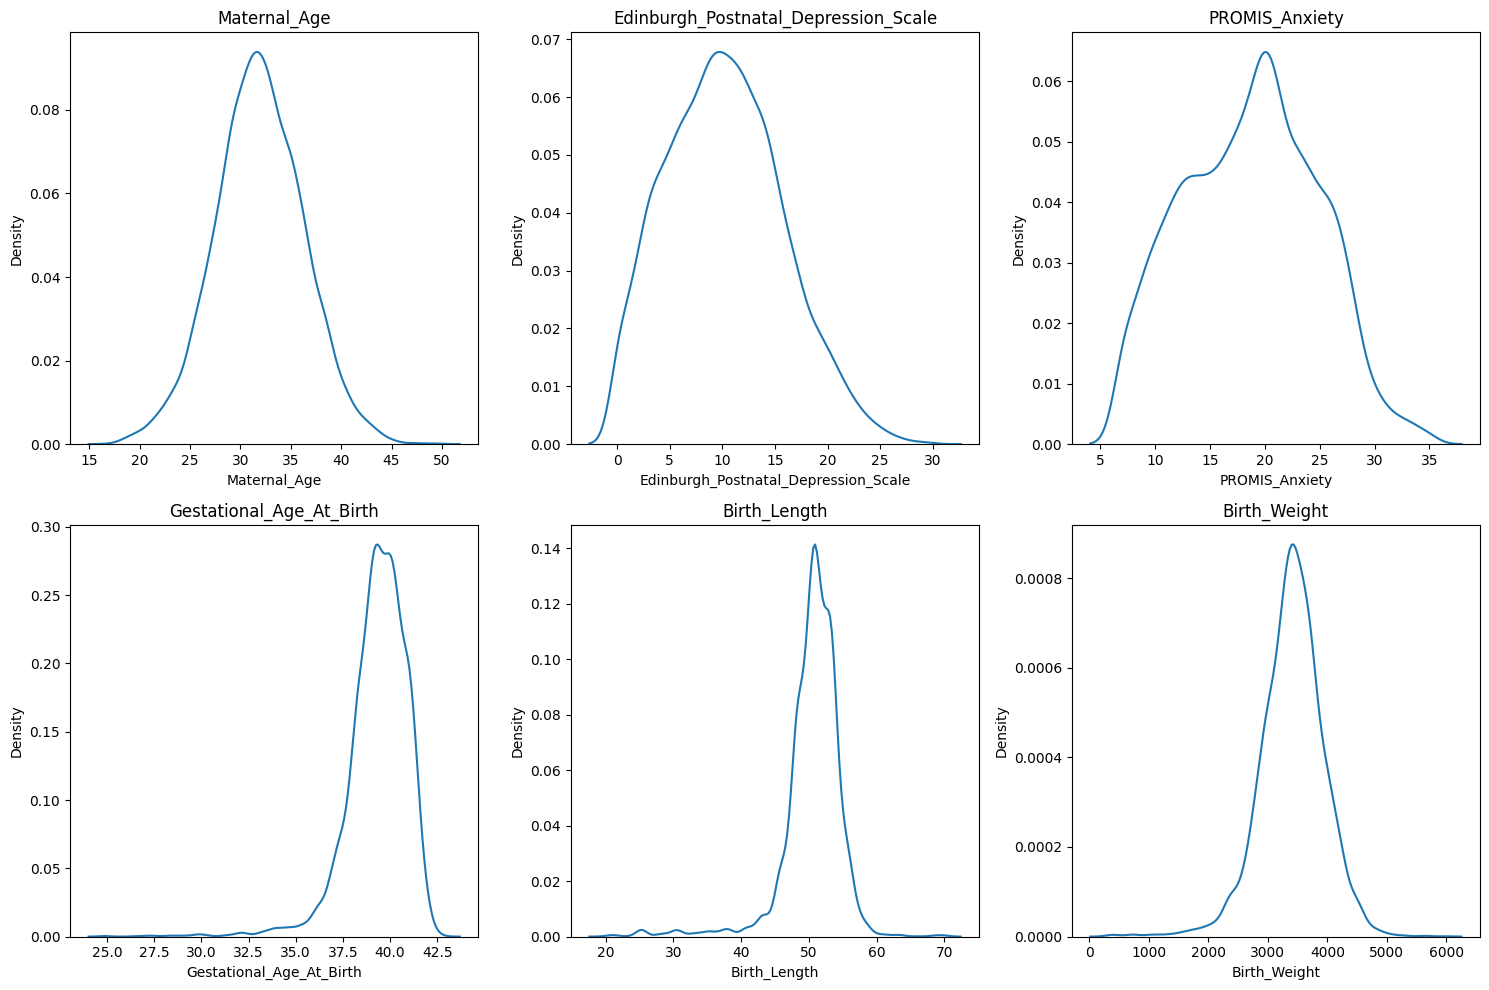

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(numerical_df.columns):
  if i <6:
    sns.kdeplot(data=numerical_df[col], ax=axs[i])
    axs[i].set_title(col)


plt.tight_layout()
plt.show()

In [16]:
mental_health['Threaten_Life'].unique()

array([  2.,  53.,  23.,  29.,  24.,  nan,  27.,  50.,   0.,  68.,  30.,
        79.,  73.,  85.,  34.,  43.,   9.,  21.,  25.,  22.,  54.,  74.,
        16.,  58.,  75.,  36.,  94.,  49.,  56.,  28.,  71.,  10.,  69.,
         4.,  33.,   3.,  48.,  64., 100.,  72.,  61.,  52.,   5.,  60.,
         8.,  82.,  59.,  63.,  51.,  80.,  55.,  91.,  67.,  66.,   6.,
        13.,  32.,  19.,  26.,  37.,  14.,  45.,  17.,  47.,  98.,  20.,
        95.,  31.,  70.,  78.,  18.,  83.,   7.,  65.,  38.,  81.,  76.,
        35.,  12.,  39.,  11.,  46.,  57.,  96.,   1.,  90.,  97.,  15.,
        86.,  40.,  99.,  77.,  88.,  93.,  84.,  92.,  41.,  62.,  89.,
        44.,  87.,  42.])

In [17]:
mental_health['Threaten_Baby_Danger'].unique()

array([  3.,  33.,  67.,  32.,  36.,  30.,  nan,  76.,  88.,  50.,  69.,
        74., 100.,  31.,  85.,  60.,  10.,  68.,  26.,  22.,  63.,   0.,
        92.,  15.,  28.,  70.,  58.,  95.,  47.,  62.,  23.,  96.,  66.,
        75.,  29.,   9.,  46.,   5.,  59.,  78.,  71.,  81.,  91.,   7.,
        94.,  49.,   8.,  72.,  83.,  77.,  52.,  79.,  73.,  97.,  48.,
        38.,  65.,  11.,  12.,  51.,  42.,  39.,  35.,  80.,  43.,  82.,
        45.,  25.,  41.,  34.,  20.,  53.,  98.,  86.,  27.,  93.,  40.,
        99.,  64.,  84.,   1.,  19.,  17.,   4.,  57.,  61.,  14.,   2.,
        16.,  55.,  24.,  54.,  89.,  37.,   6.,  56.,  18.,  90.,  13.,
        21.,  87.,  44.])

In [18]:
mental_health['Threaten_Baby_Harm'].unique()

array([ 27.,  92.,  54.,  71.,  33.,  32.,  nan,  72.,  84.,  98.,  81.,
        50.,  97.,  64.,  70., 100.,  83.,  29.,  99.,  68.,  15.,  73.,
        30.,  67.,   0.,  95.,  31.,  25.,  91.,  75.,  53.,  23.,  78.,
        62.,  24.,  96.,   5.,  55.,  49.,  48.,  63.,  46.,  66.,  94.,
        89.,  88.,  38.,  90.,  87.,  69.,  76.,  20.,   4.,  44.,   7.,
        58.,  36.,  93.,  65.,  18.,  74.,  22.,  45.,  43.,  51.,  34.,
        79.,  19.,  86.,  47.,  80.,  52.,  17.,  28.,  26.,  77.,  85.,
        10.,  14.,  82.,   1.,  11.,  35.,  59.,  12.,   3.,  41.,   8.,
        37.,  60.,  40.,  16.,  42.,  57.,  61.,  39.,   9.,  21.,   6.,
        13.,  56.,   2.])

In [19]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10203 non-null  float64
 1   Household_Income($)                         10068 non-null  object 
 2   Maternal_Education                          10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay      

In [20]:
mental_health['Threaten_Baby_Harm'].fillna(-1, inplace=True)
mental_health['Threaten_Life'].fillna(-1, inplace=True)
mental_health['Threaten_Baby_Danger'].fillna(-1, inplace=True)

In [21]:
mental_health['Threaten_Life'].unique()

array([  2.,  53.,  23.,  29.,  24.,  -1.,  27.,  50.,   0.,  68.,  30.,
        79.,  73.,  85.,  34.,  43.,   9.,  21.,  25.,  22.,  54.,  74.,
        16.,  58.,  75.,  36.,  94.,  49.,  56.,  28.,  71.,  10.,  69.,
         4.,  33.,   3.,  48.,  64., 100.,  72.,  61.,  52.,   5.,  60.,
         8.,  82.,  59.,  63.,  51.,  80.,  55.,  91.,  67.,  66.,   6.,
        13.,  32.,  19.,  26.,  37.,  14.,  45.,  17.,  47.,  98.,  20.,
        95.,  31.,  70.,  78.,  18.,  83.,   7.,  65.,  38.,  81.,  76.,
        35.,  12.,  39.,  11.,  46.,  57.,  96.,   1.,  90.,  97.,  15.,
        86.,  40.,  99.,  77.,  88.,  93.,  84.,  92.,  41.,  62.,  89.,
        44.,  87.,  42.])

In [23]:
print(mental_health['Household_Income($)'].value_counts())
print('****'*10)

print(mental_health['Maternal_Education'].value_counts())
print('****'*10)

print(mental_health['Delivery_Mode'].value_counts())
print('****'*10)

print(mental_health['NICU_Stay'].value_counts())

Household_Income($)
70000-99999        2006
100000-124999      1886
40000-69999        1348
125000-149999      1315
150000-174999      1115
200000+             977
175000-199999       641
20000-39999         561
Less than 20000     219
Name: count, dtype: int64
****************************************
Maternal_Education
Undergraduate degree             3979
College/trade school             2588
Masters degree                   1849
High school diploma               835
Doctoral Degree                   767
Less than high school diploma     121
Name: count, dtype: int64
****************************************
Delivery_Mode
Vaginally                        3904
Caesarean-section (c-section)    1633
Name: count, dtype: int64
****************************************
NICU_Stay
No     4986
Yes     548
Name: count, dtype: int64


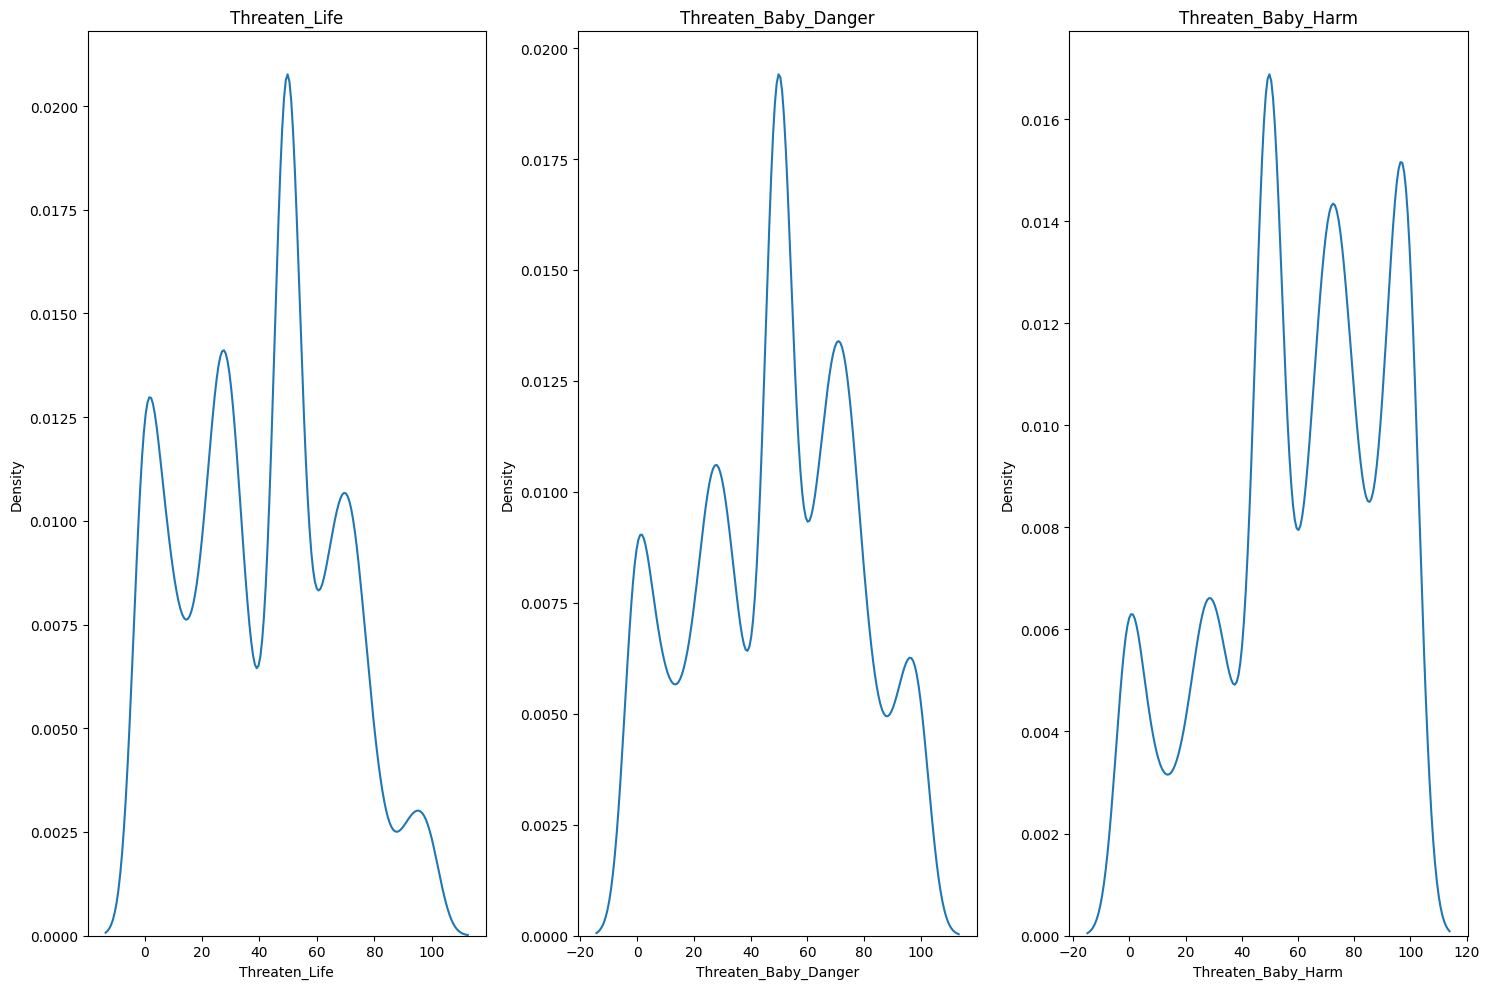

In [24]:
fig, axs= plt.subplots(1,3, figsize=(15,10))
axs= axs.flatten()

sns.kdeplot(data=mental_health['Threaten_Life'], ax=axs[0])
axs[0].set_title('Threaten_Life')

sns.kdeplot(data=mental_health['Threaten_Baby_Danger'], ax=axs[1])
axs[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(data=mental_health['Threaten_Baby_Harm'], ax=axs[2])
axs[2].set_title('Threaten_Baby_Harm')


plt.tight_layout()
plt.show()

### Bivariate analysis

In [25]:
mental_health['Gestational_Age_At_Birth']= np.round(mental_health['Gestational_Age_At_Birth']/4.33,2) #converting to months

In [26]:
#healthy weight
def healthy_weight(row):
    if pd.isnull(row['Birth_Weight']):
        return 'N/A'
    elif row['Birth_Weight']>2550 and row['Birth_Weight']<4000:
        return 'Healthy'
    else:
        return 'Unhealthy'

#healthy height
def healthy_height(row):
    if pd.isnull(row['Birth_Length']):
        return 'N/A'
    elif row['Birth_Length']>39 and row['Birth_Length']<61:
        return 'Healthy'
    else:
        return 'Unhealthy'

In [27]:
mental_health['Weight']= mental_health.apply(healthy_weight, axis=1)
mental_health['Height']= mental_health.apply(healthy_height, axis=1)

In [28]:
mental_health.head()

Maternal_Age Household_Income($)    Maternal_Education  \
0          38.3             200000+        Masters degree   
1          34.6             200000+  Undergraduate degree   
3          28.8       100000-124999        Masters degree   
4          36.5         40000-69999  Undergraduate degree   
5          38.3       150000-174999  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   
3                                   9.0            20.0   
4                                  14.0            20.0   
5                                   3.0             8.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                      9.17                                    Dec2020   
1                       NaN                                        NaN   
3                      8.91                                    Dec2020   
4                      9.21                                    Oct2020   
5                      8.91                                    Jun2020   

   Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0         49.20        3431.0                      Vaginally        No   
1           NaN           NaN                            NaN       NaN   
3         41.00        2534.0                      Vaginally        No   
4         53.34        3714.0  Caesarean-section (c-section)        No   
5           NaN           NaN                            NaN       NaN   

   Threaten_Life  Threaten_Baby_Danger  Threaten_Baby_Harm     Weight   Height  
0            2.0                   3.0                27.0    Healthy  Healthy  
1            2.0                  33.0                92.0        N/A      N/A  
3           53.0                  67.0                54.0  Unhealthy  Healthy  
4           23.0                  32.0                71.0    Healthy  Healthy  
5           29.0                  36.0                33.0        N/A      N/A

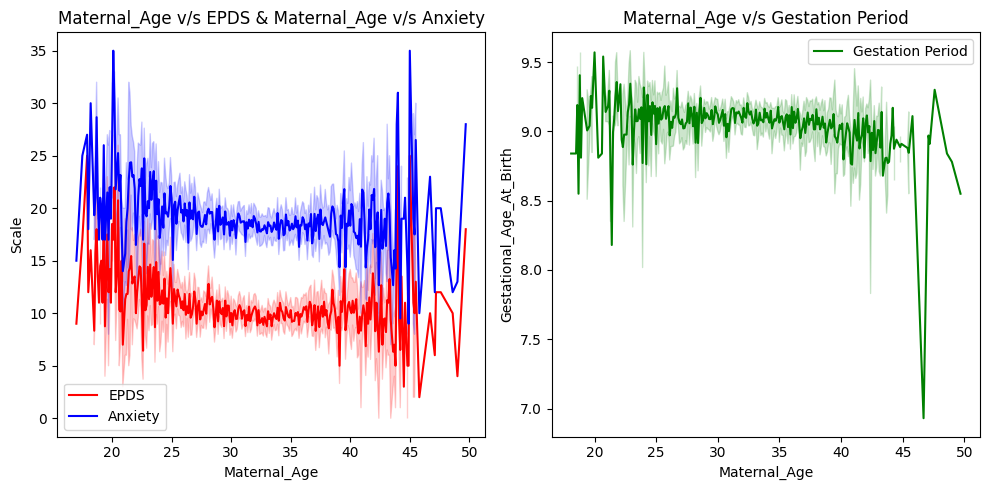

In [29]:
fig,axs= plt.subplots(1,2, figsize=(10,5))
axs= axs.flatten()

sns.lineplot(x='Maternal_Age', y='Edinburgh_Postnatal_Depression_Scale', data=mental_health, ax=axs[0],color='red' ,label='EPDS')
sns.lineplot(x='Maternal_Age', y='PROMIS_Anxiety', data=mental_health, ax=axs[0],color='blue' ,label='Anxiety')
axs[0].set_ylabel('Scale')
axs[0].set_title('Maternal_Age v/s EPDS & Maternal_Age v/s Anxiety')

sns.lineplot(x='Maternal_Age', y='Gestational_Age_At_Birth', data=mental_health, ax=axs[1],color='green' ,label='Gestation Period')
axs[1].set_title('Maternal_Age v/s Gestation Period')

plt.tight_layout()
plt.show()

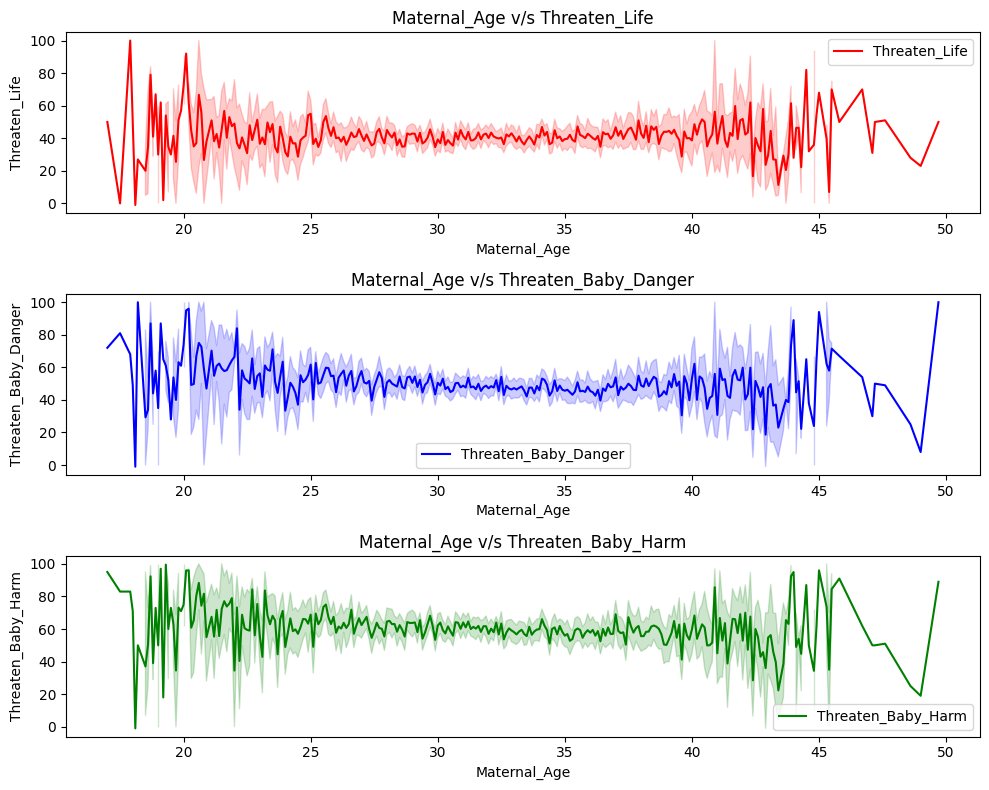

In [30]:
fig,axs= plt.subplots(3, 1, figsize=(10,8))
axs= axs.flatten()

sns.lineplot(x='Maternal_Age', y='Threaten_Life', data=mental_health, ax=axs[0], color='red' ,label='Threaten_Life')
axs[0].set_title('Maternal_Age v/s Threaten_Life')

sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Danger', data=mental_health, ax=axs[1], color='blue' ,label='Threaten_Baby_Danger')
axs[1].set_title('Maternal_Age v/s Threaten_Baby_Danger')

sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Harm', data=mental_health, ax=axs[2], color='green' ,label='Threaten_Baby_Harm')
axs[2].set_title('Maternal_Age v/s Threaten_Baby_Harm')

plt.tight_layout()
plt.show()

In [31]:
new_df= mental_health[(mental_health['Delivery_Mode'].notnull()) & (mental_health['Maternal_Age'].notnull())]

In [32]:
new_df= new_df[['Delivery_Mode','Maternal_Age']]

In [33]:
new_df

Delivery_Mode  Maternal_Age
0                          Vaginally          38.3
3                          Vaginally          28.8
4      Caesarean-section (c-section)          36.5
8                          Vaginally          33.1
11     Caesarean-section (c-section)          29.5
...                              ...           ...
10755  Caesarean-section (c-section)          41.7
10756  Caesarean-section (c-section)          27.8
10757                      Vaginally          36.2
10761                      Vaginally          33.2
10763                      Vaginally          24.0

[5522 rows x 2 columns]

In [34]:
def age_category(row):
  if(row['Maternal_Age']<23):
    return 'UnderAge'
  elif(row['Maternal_Age']>=23 and row['Maternal_Age']<38):
    return 'Healthy'
  else:
    return 'Old Age'

new_df['Age_Category']= new_df.apply(age_category, axis=1)

In [35]:
new_df

Delivery_Mode  Maternal_Age Age_Category
0                          Vaginally          38.3      Old Age
3                          Vaginally          28.8      Healthy
4      Caesarean-section (c-section)          36.5      Healthy
8                          Vaginally          33.1      Healthy
11     Caesarean-section (c-section)          29.5      Healthy
...                              ...           ...          ...
10755  Caesarean-section (c-section)          41.7      Old Age
10756  Caesarean-section (c-section)          27.8      Healthy
10757                      Vaginally          36.2      Healthy
10761                      Vaginally          33.2      Healthy
10763                      Vaginally          24.0      Healthy

[5522 rows x 3 columns]

In [36]:
new_df.groupby('Age_Category')['Delivery_Mode'].value_counts().reset_index()

Age_Category                  Delivery_Mode  count
0      Healthy                      Vaginally   3534
1      Healthy  Caesarean-section (c-section)   1381
2      Old Age                      Vaginally    315
3      Old Age  Caesarean-section (c-section)    233
4     UnderAge                      Vaginally     43
5     UnderAge  Caesarean-section (c-section)     16

In [37]:
cols =['NICU_Stay', 'Weight', 'Height'] #v/s Maternal Age

In [38]:
#logistic classification hypothesis
#independent variable(maternal age) - continous
#dependent variable(NICU/Weight/Height)- binary

In [39]:
import statsmodels.api as sm

In [40]:
mental_health['NICU_Stay'] = mental_health['NICU_Stay'].fillna("Data Missing")

In [41]:
for i in cols:

    #cleaning data
    df = mental_health[(mental_health[i] != 'Data Missing') & (mental_health['Maternal_Age'].notnull())]

    #Binary encoding
    if i == 'NICU_Stay':
        df['binary'] = df[i].apply(lambda x: 1 if x=='Yes' else 0)
    else:
        df['binary'] = df[i].apply(lambda x: 1 if x=='Unhealthy' else 0)

    #model
    X= df['Maternal_Age']
    y= df['binary']

    x= sm.add_constant(X)

    logit_model= sm.Logit(y,x)
    result= logit_model.fit()
    
    p_value = result.pvalues['Maternal_Age']
    alpha =0.3
    
    if p_value < alpha:
        print(f"There is a significant associaton  between the  age of  pregnant  women and likelihood of {i}")
    else:
        print(f"There is no  significant associaton  between the  age of  pregnant  women and  likelihood of {i}")    

Optimization terminated successfully.
         Current function value: 0.321824
         Iterations 6
There is a significant associaton  between the  age of  pregnant  women and likelihood of NICU_Stay
Optimization terminated successfully.
         Current function value: 0.321890
         Iterations 6
There is a significant associaton  between the  age of  pregnant  women and likelihood of Weight
Optimization terminated successfully.
         Current function value: 0.082896
         Iterations 8
There is a significant associaton  between the  age of  pregnant  women and likelihood of Height


#### CONCLUSIONS
- Women who conceive between the ages of 25 and 38 are generally less likely to experience anxiety attacks or post-pregnancy depression. This age group is also better equipped to care for themselves and their newborns effectively.

- Conceiving after the age of 42 presents significant risks for the baby, including a higher likelihood of premature birth, particularly before 7.5 months of gestation.

- Women aged 25-42 tend to be less concerned about the impact of COVID-19 on their own health and that of their newborns compared to younger women under 25 and older women over 45. Women over 43, however, show heightened concern about COVID-19’s effects, which may contribute to increased anxiety and post-pregnancy depression in this age group.

- After the age of 38, there is a noticeable 13% [28-41%] increase in the probability of requiring a cesarean section instead of a natural delivery, highlighting the physiological changes that come with maternal age and their impact on childbirth.

- Hypothesis testing revealed a significant association between maternal age and the likelihood of a newborn needing intensive medical supervision (NICU stay) and having an unhealthy weight and height.

- High levels of anxiety, depression, and the risk of premature birth are potential factors contributing to the admission of newborns to the NICU after delivery.

In [42]:
mental_health['Household_Income($)'].unique()

array(['200000+', '100000-124999', '40000-69999', '150000-174999', nan,
       '70000-99999', '175000-199999', '125000-149999', '20000-39999',
       'Less than 20000'], dtype=object)

In [43]:
#household income v/s Threaten_Baby_Danger
mental_health.groupby('Household_Income($)')['Threaten_Baby_Danger'].mean().reset_index().sort_values('Threaten_Baby_Danger', ascending=False)

Household_Income($)  Threaten_Baby_Danger
8     Less than 20000             58.598174
4         20000-39999             56.830660
6         40000-69999             51.953264
7         70000-99999             50.421236
0       100000-124999             49.010074
1       125000-149999             47.614449
2       150000-174999             47.303139
5             200000+             45.904811
3       175000-199999             45.726989

In [44]:
#household income v/s Threaten_Life
mental_health.groupby('Household_Income($)')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life', ascending=False)

Household_Income($)  Threaten_Life
8     Less than 20000      49.589041
4         20000-39999      46.424242
6         40000-69999      43.706973
7         70000-99999      41.176969
0       100000-124999      40.762990
2       150000-174999      40.365919
1       125000-149999      39.473004
3       175000-199999      39.101404
5             200000+      38.628454

In [45]:
#household income v/s Threaten_Baby_Harm
mental_health.groupby('Household_Income($)')['Threaten_Baby_Harm'].mean().reset_index().sort_values('Threaten_Baby_Harm', ascending=False)

Household_Income($)  Threaten_Baby_Harm
8     Less than 20000           65.123288
4         20000-39999           65.028520
7         70000-99999           61.764706
6         40000-69999           61.467359
0       100000-124999           60.941145
1       125000-149999           60.445627
3       175000-199999           59.078003
5             200000+           58.820880
2       150000-174999           58.670852

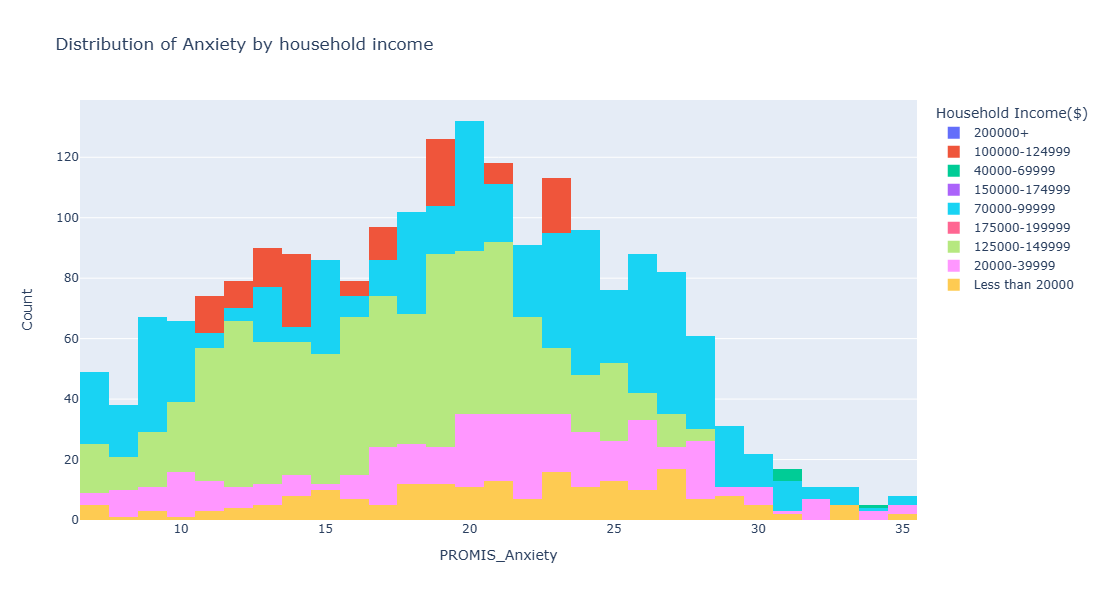

In [46]:
#Household income v/s Anxiety
categories = mental_health['Household_Income($)'].unique()

for i in categories:    
    df= mental_health[mental_health['Household_Income($)']==i]
    fig = px.histogram(mental_health, x='PROMIS_Anxiety', color='Household_Income($)',
                   title='Distribution of Anxiety by household income',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="PROMIS_Anxiety",
    yaxis_title="Count",
    legend_title="Household Income($)",
    barmode= 'overlay',
    width=1000,
    height=600
)

fig.show()

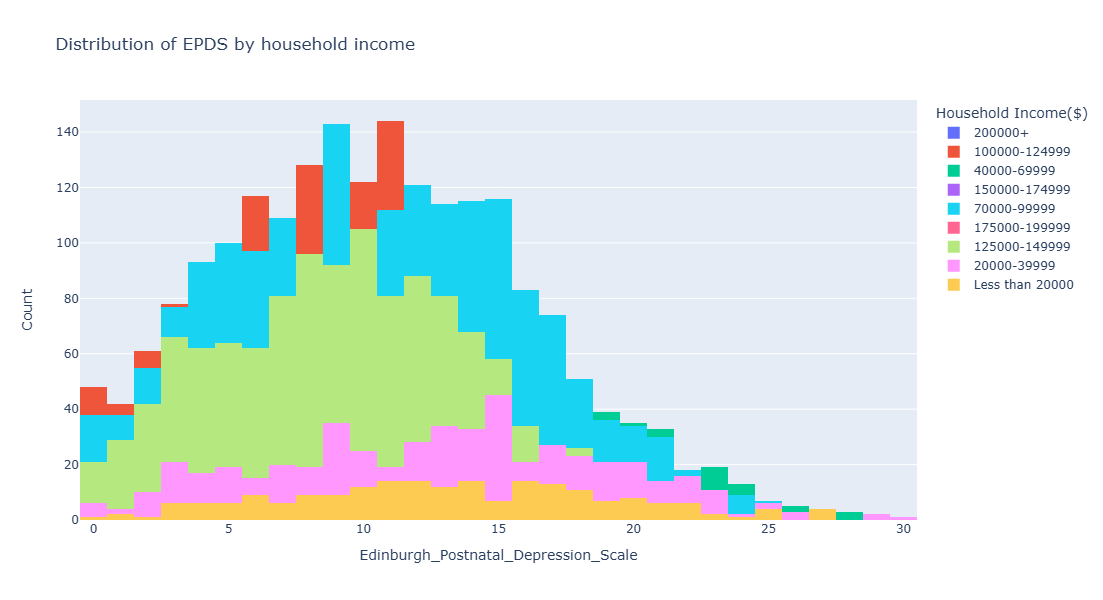

In [47]:
#Household income v/s EPDS
categories = mental_health['Household_Income($)'].unique()

for i  in categories:
  df= mental_health[mental_health['Household_Income($)']==i]
  fig= px.histogram(mental_health, x='Edinburgh_Postnatal_Depression_Scale', color='Household_Income($)',
                   title='Distribution of EPDS by household income',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="Edinburgh_Postnatal_Depression_Scale",
    yaxis_title="Count",
    legend_title="Household Income($)",
    barmode= 'overlay',
    width=1000,
    height=600
)

fig.show()

#### CONCLUSIONS

- It is evident from the observations that individuals living below the poverty line ($70,000) are significantly more susceptible to anxiety and EPDS (Edinburgh Postnatal Depression Scale) scores. Within this income bracket, nearly 70% of the population has been diagnosed with anxiety and depression, exacerbated by the conditions brought on by the COVID-19 pandemic.

- There is a positive correlation between increased income and reduced probability of anxiety and depression. High-income individuals have approximately a 33% chance of being diagnosed with anxiety and depression due to COVID-19, indicating a substantial mental health benefit associated with higher income levels.


- The COVID-19 pandemic has had a profoundly adverse impact on low-income families, particularly those below the survival line. The shortage of income has heightened their worries about the well-being of their children and women. Families below the survival line exhibit a very high threatening score for women, with an average score of 51/100. In contrast, as income levels rise, concerns diminish, likely due to better access to healthcare facilities for higher-income families.

- Unlike the varying threatening scores for women across income levels, the concern for the impact of COVID-19 on newborns is universal. Regardless of income, all categories show significant worry about potential harm and damage to newborns, which may contribute to high anxiety levels in pregnant women during the pandemic.

In [48]:
mental_health['Maternal_Education'].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       nan, 'College/trade school', 'Less than high school diploma',
       'Doctoral Degree'], dtype=object)

In [49]:
#household income v/s Threaten_Baby_Danger
mental_health.groupby('Maternal_Education')['Threaten_Baby_Danger'].mean().reset_index().sort_values('Threaten_Baby_Danger', ascending=False)

Maternal_Education  Threaten_Baby_Danger
2            High school diploma             53.347305
3  Less than high school diploma             52.404959
0           College/trade school             52.069938
5           Undergraduate degree             48.609450
4                 Masters degree             46.194700
1                Doctoral Degree             45.238592

In [50]:
#household income v/s Threaten_Baby_Harm
mental_health.groupby('Maternal_Education')['Threaten_Baby_Harm'].mean().reset_index().sort_values('Threaten_Baby_Harm', ascending=False)

Maternal_Education  Threaten_Baby_Harm
2            High school diploma           62.417964
3  Less than high school diploma           62.280992
0           College/trade school           62.045595
5           Undergraduate degree           60.532295
4                 Masters degree           58.971336
1                Doctoral Degree           57.327249

In [51]:
#household income v/s Threaten_Life
mental_health.groupby('Maternal_Education')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life', ascending=False)

Maternal_Education  Threaten_Life
2            High school diploma      42.826347
0           College/trade school      42.681994
3  Less than high school diploma      41.917355
5           Undergraduate degree      41.033425
4                 Masters degree      38.873445
1                Doctoral Degree      38.614081

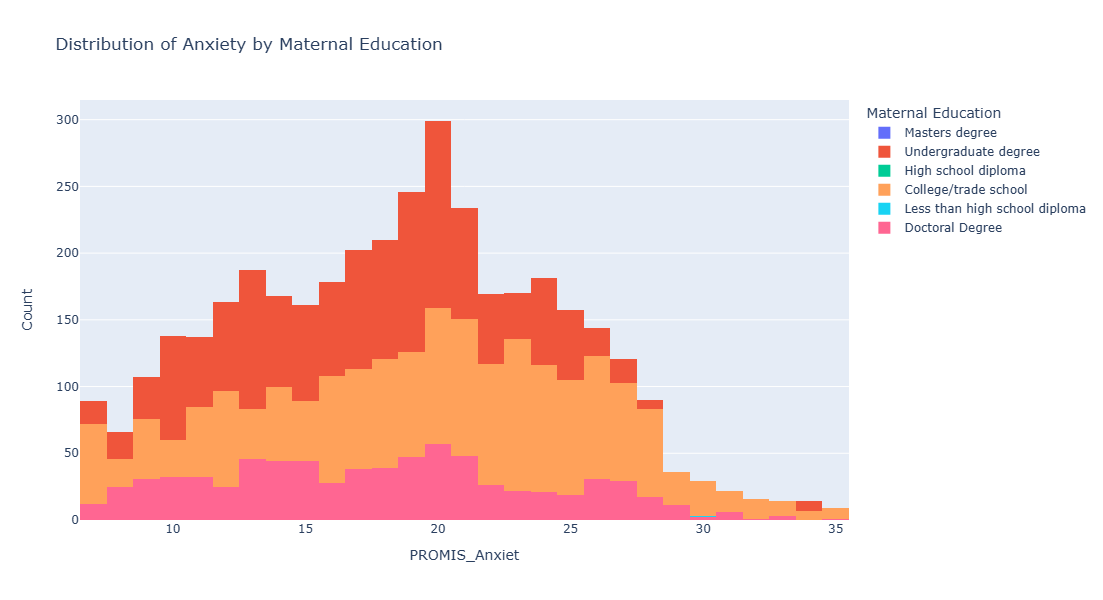

In [52]:
#Maternal_Education v/s Anxiety
categories = mental_health['Maternal_Education'].unique()

for i in categories:
    df= mental_health[mental_health['Maternal_Education']==i]
    fig = px.histogram(mental_health, x='PROMIS_Anxiety', color='Maternal_Education',
                   title='Distribution of Anxiety by Maternal Education',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="PROMIS_Anxiet",
    yaxis_title="Count",
    legend_title="Maternal Education",
    barmode= 'overlay',
    width=1000,
    height=600 
)

fig.show()

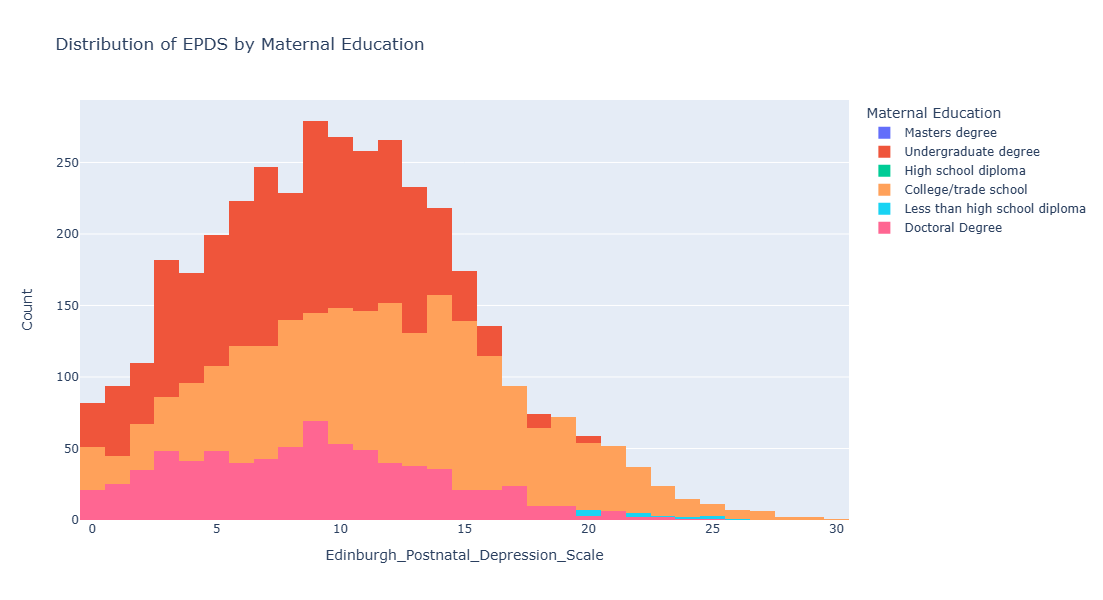

In [53]:
#Maternal_Education v/s EPDS
categories = mental_health['Maternal_Education'].unique()

for i in categories:
    df= mental_health[mental_health['Maternal_Education']==i]
    fig = px.histogram(mental_health, x='Edinburgh_Postnatal_Depression_Scale', color='Maternal_Education',
                   title='Distribution of EPDS by Maternal Education',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="Edinburgh_Postnatal_Depression_Scale",
    yaxis_title="Count",
    legend_title="Maternal Education",
    barmode= 'overlay',
    width=1000,
    height=600 
)

fig.show()

#### CONCLUSIONS
- Higher Education, Less Worry: Mothers with higher levels of education generally feel less worried about their own life and their baby’s safety during the COVID-19 pandemic.
- Education Helps in Crisis: Education seems to help mothers better manage and understand risks during tough times, possibly because they have more access to reliable information, strong support, and confidence.
- Lower Education, More Anxiety: On the other hand, mothers with less education tend to feel more anxious and perceive higher risks. This could be because they might not have the same resources, information, or support to help them cope effectively.

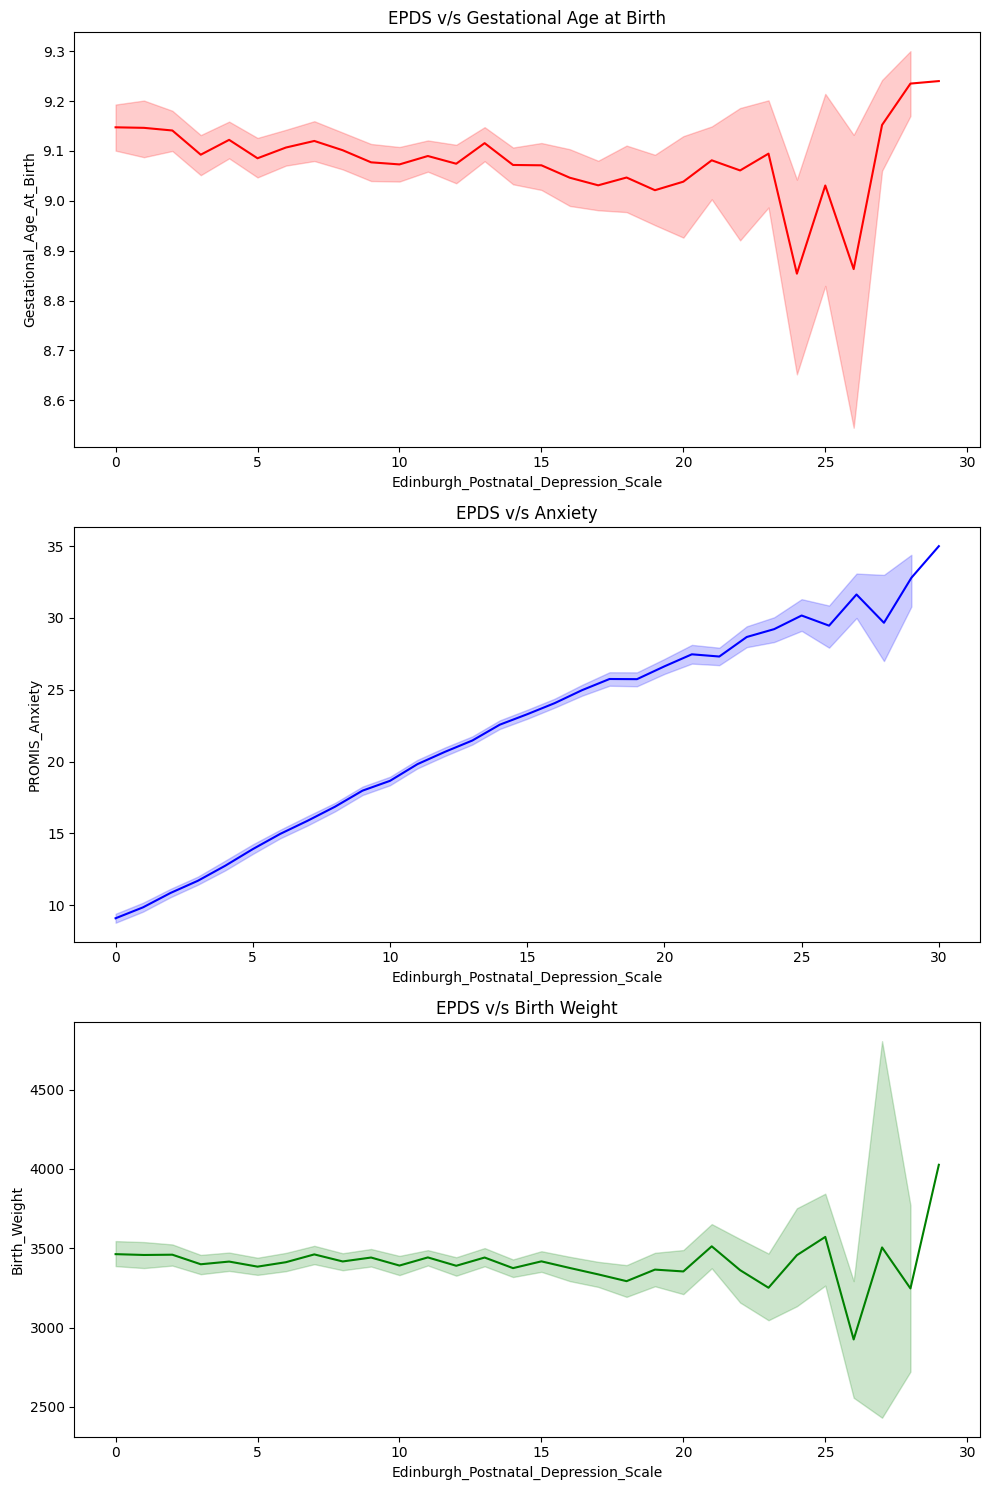

In [54]:
fig,axs= plt.subplots(3, 1, figsize=(10,15))
axs= axs.flatten()


sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='Gestational_Age_At_Birth', data=mental_health, color='red', ax=axs[0])
axs[0].set_title('EPDS v/s Gestational Age at Birth')

sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='PROMIS_Anxiety', data=mental_health, color='blue', ax=axs[1])
axs[1].set_title('EPDS v/s Anxiety')

sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='Birth_Weight', data=mental_health, color='green', ax=axs[2])
axs[2].set_title('EPDS v/s Birth Weight')

plt.tight_layout()
plt.show()

In [55]:
df1 = mental_health[(mental_health['Weight'] != 'N/A') & (mental_health['Delivery_Mode'].notnull())
& (mental_health['Height'] != 'N/A') & (mental_health['NICU_Stay'].notnull())]

In [56]:
#Weight v/s Delivery Mode

df1.groupby('Delivery_Mode')['Weight'].value_counts().reset_index()

Delivery_Mode     Weight  count
0  Caesarean-section (c-section)    Healthy   1274
1  Caesarean-section (c-section)  Unhealthy    339
2                      Vaginally    Healthy   3287
3                      Vaginally  Unhealthy    579

In [57]:
#Weight v/s NICU

df1.groupby('Weight')['NICU_Stay'].value_counts().reset_index()

Weight NICU_Stay  count
0    Healthy        No   4216
1    Healthy       Yes    345
2  Unhealthy        No    721
3  Unhealthy       Yes    197

In [58]:
#Height v/s Delivery Mode

df1.groupby('Delivery_Mode')['Height'].value_counts().reset_index()

Delivery_Mode     Height  count
0  Caesarean-section (c-section)    Healthy   1550
1  Caesarean-section (c-section)  Unhealthy     63
2                      Vaginally    Healthy   3762
3                      Vaginally  Unhealthy    104

In [59]:
#Height v/s NICU

df1.groupby('Height')['NICU_Stay'].value_counts().reset_index()

Height NICU_Stay  count
0    Healthy        No   4807
1    Healthy       Yes    505
2  Unhealthy        No    130
3  Unhealthy       Yes     37

#### CONCLUSIONS
- Correlation Between High EPDS Scores and Pre-Mature Births: Data shows a notable correlation between high Edinburgh Postnatal Depression Scale (EPDS) scores and the likelihood of pre-mature births. However, these pre-mature births typically occur after 8.5 months of gestation, which is within the medically acceptable range and generally poses minimal health risks to the newborn.

- Link Between EPDS and Anxiety Levels: Women with high EPDS scores often experience elevated levels of anxiety, and vice versa. This suggests a close relationship between these two mental health conditions, where an increase in one is likely to coincide with an increase in the other.

- C-Section Likelihood and Unhealthy Birth Metrics: There is a 37% chance that women with babies of unhealthy birth weight will require a C-section, which is 10% higher compared to those with babies of healthy birth weight. This trend is also observed with unhealthy birth height, indicating a strong connection between poor birth metrics and the need for a C-section.

- NICU Admissions and Unhealthy Birth Metrics: Babies with unhealthy birth weight have a 22% chance of needing a NICU stay, which is 15% higher than for those with healthy birth weight. The same pattern is seen with birth height, emphasizing the critical role of healthy birth metrics in reducing the necessity for intensive neonatal care.

### Multivariate Analysis

In [60]:
mental_health.groupby(
    ['Maternal_Age','Household_Income($)','Maternal_Education']
)['Edinburgh_Postnatal_Depression_Scale'].mean().reset_index().sort_values(
    'Edinburgh_Postnatal_Depression_Scale', ascending=False
).head(30)

Maternal_Age Household_Income($)             Maternal_Education  \
2644          34.3         20000-39999           College/trade school   
51            20.5         40000-69999           College/trade school   
2037          32.1         40000-69999            High school diploma   
4048          42.2         40000-69999           College/trade school   
992           28.2     Less than 20000           College/trade school   
27            19.6         20000-39999            High school diploma   
42            20.2     Less than 20000           College/trade school   
3274          36.7         40000-69999  Less than high school diploma   
627           26.5         20000-39999           Undergraduate degree   
1714          31.0         20000-39999            High school diploma   
395           25.0         70000-99999           College/trade school   
2169          32.6       150000-174999           College/trade school   
1038          28.4         40000-69999            High school diploma   
216           23.4         40000-69999            High school diploma   
2001          32.0         20000-39999                 Masters degree   
3803          39.5         20000-39999           College/trade school   
1685          30.9         20000-39999           Undergraduate degree   
4135          45.0         70000-99999           College/trade school   
968           28.1     Less than 20000           College/trade school   
942           28.0         40000-69999  Less than high school diploma   
2             17.9     Less than 20000  Less than high school diploma   
1273          29.3         70000-99999            High school diploma   
296           24.2     Less than 20000           Undergraduate degree   
689           26.8         40000-69999  Less than high school diploma   
186           23.0         70000-99999           College/trade school   
4119          44.0         40000-69999           Undergraduate degree   
3860          40.0       150000-174999                Doctoral Degree   
3904          40.3         40000-69999                 Masters degree   
10            18.6         40000-69999  Less than high school diploma   
3455          37.5         70000-99999            High school diploma   

      Edinburgh_Postnatal_Depression_Scale  
2644                                  29.0  
51                                    29.0  
2037                                  28.0  
4048                                  28.0  
992                                   27.0  
27                                    27.0  
42                                    27.0  
3274                                  26.0  
627                                   26.0  
1714                                  26.0  
395                                   26.0  
2169                                  26.0  
1038                                  26.0  
216                                   26.0  
2001                                  25.0  
3803                                  25.0  
1685                                  25.0  
4135                                  25.0  
968                                   25.0  
942                                   25.0  
2                                     25.0  
1273                                  24.5  
296                                   24.0  
689                                   24.0  
186                                   24.0  
4119                                  24.0  
3860                                  24.0  
3904                                  24.0  
10                                    24.0  
3455                                  24.0

In [61]:
#probability of women with low EPDS having high Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']<12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']<12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having low EPDS and high Anxiety is {(b/a)*100}")

Probability of women having low EPDS and high Anxiety is 14.884768670940913


In [62]:
#probability of women with high EPDS having high Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']>12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']>12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having high EPDS and high Anxiety is {(b/a)*100}")

Probability of women having high EPDS and high Anxiety is 81.31833801936895


In [63]:
mental_health.groupby(
    ['Maternal_Age','Household_Income($)','Maternal_Education']
)[['Threaten_Life','Threaten_Baby_Harm','Threaten_Baby_Danger']].mean().reset_index().sort_values(
    by= ['Threaten_Life','Threaten_Baby_Harm','Threaten_Baby_Danger'], ascending=False
).head(40)

Maternal_Age Household_Income($)             Maternal_Education  \
54            20.6         20000-39999            High school diploma   
529           25.9         20000-39999           College/trade school   
882           27.8       100000-124999                 Masters degree   
905           27.9       100000-124999           College/trade school   
940           28.0         40000-69999           College/trade school   
977           28.2       150000-174999           College/trade school   
1475          30.1     Less than 20000           College/trade school   
2268          32.9         40000-69999            High school diploma   
2653          34.3         40000-69999            High school diploma   
2864          35.1         20000-39999  Less than high school diploma   
3522          37.8     Less than 20000                 Masters degree   
4048          42.2         40000-69999           College/trade school   
4113          43.8         20000-39999           College/trade school   
4069          42.6     Less than 20000           Undergraduate degree   
1226          29.1     Less than 20000  Less than high school diploma   
1236          29.2       175000-199999                Doctoral Degree   
4073          42.7       125000-149999           Undergraduate degree   
2726          34.6         20000-39999            High school diploma   
881           27.8       100000-124999            High school diploma   
2001          32.0         20000-39999                 Masters degree   
3932          40.7       125000-149999                Doctoral Degree   
3216          36.5       100000-124999                 Masters degree   
3226          36.5         20000-39999           College/trade school   
2276          33.0       100000-124999                Doctoral Degree   
3945          40.8       175000-199999           College/trade school   
2814          34.9         40000-69999           College/trade school   
2872          35.1         70000-99999                 Masters degree   
3665          38.6       150000-174999            High school diploma   
320           24.4     Less than 20000           College/trade school   
2             17.9     Less than 20000  Less than high school diploma   
216           23.4         40000-69999            High school diploma   
2346          33.2       175000-199999           Undergraduate degree   
1429          29.9     Less than 20000            High school diploma   
473           25.5         70000-99999           Undergraduate degree   
485           25.6         40000-69999           Undergraduate degree   
770           27.2         70000-99999            High school diploma   
2120          32.4         20000-39999                 Masters degree   
189           23.1         20000-39999           College/trade school   
372           24.8     Less than 20000           College/trade school   
3373          37.1     Less than 20000           College/trade school   

      Threaten_Life  Threaten_Baby_Harm  Threaten_Baby_Danger  
54            100.0               100.0                 100.0  
529           100.0               100.0                 100.0  
882           100.0               100.0                 100.0  
905           100.0               100.0                 100.0  
940           100.0               100.0                 100.0  
977           100.0               100.0                 100.0  
1475          100.0               100.0                 100.0  
2268          100.0               100.0                 100.0  
2653          100.0               100.0                 100.0  
2864          100.0               100.0                 100.0  
3522          100.0               100.0                 100.0  
4048          100.0               100.0                 100.0  
4113          100.0               100.0                  98.0  
4069          100.0               100.0                  96.0  
1226          100.0               100.0             

#### CONCLUSIONS

- Vulnerability to High EPDS Scores: Women across all age groups with low household income and low education levels are the most susceptible to high scores on the Edinburgh Postnatal Depression Scale (EPDS). However, it’s important to note that women from high-income and highly educated backgrounds can also be affected by high EPDS scores, particularly those aged 40 and above. This suggests that advanced maternal age is a significant risk factor for depression during pregnancy and the postpartum period.

- Correlation Between EPDS Scores and Anxiety: Women with low EPDS (depression) scores have a 14% likelihood of experiencing high anxiety. On the other hand, those with high EPDS scores have an 81% chance of also experiencing high anxiety, especially due to the stress and uncertainties brought about by the COVID-19 pandemic. This strong link highlights the intensified mental health challenges that these women face during crises.

- Impact of Socioeconomic Status on Health Concerns: Families with low income, regardless of age and education level, display heightened concerns about the health and safety of both the mother and newborn due to COVID-19. This increased anxiety underscores the significant impact of socioeconomic status on perceived vulnerability and health security during the pandemic.

- Influence of Education and Income on COVID-19 Concerns: Individuals with a master’s degree but low income, and those with high income but lower education levels, share similar levels of concern regarding the impact of COVID-19 on maternal and infant health. This finding emphasizes that both education and income are critical factors in shaping concerns and perceived risks related to the pandemic's effects on maternal and newborn well-being.